# COCO Dataset

In [11]:
import os
import torch
import torchvision
from torchvision.datasets import CocoDetection
from torchvision.transforms import ToTensor
from torchvision.transforms import v2
from PIL import Image

import matplotlib.pyplot as plt

In [34]:
class MyCocoDetection(torch.utils.data.Dataset):
    """`MS Coco Detection <http://mscoco.org/dataset/#detections-challenge2016>`_ Dataset.

    Args:
        root (string): Root directory where images are downloaded to.
        annFile (string): Path to json annotation file.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.ToTensor``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    """

    def __init__(self, root, annFile, transform=None, target_transform=None):
        from pycocotools.coco import COCO
        self.root = root
        self.coco = COCO(annFile)
        self.ids = list(self.coco.imgs.keys())
        self.transform = transform
        self.target_transform = target_transform

    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: Tuple (image, target). target is the object returned by ``coco.loadAnns``.
        """
        coco = self.coco
        img_id = self.ids[index]
        ann_ids = coco.getAnnIds(imgIds=img_id)
        target = coco.loadAnns(ann_ids)

        path = coco.loadImgs(img_id)[0]['file_name']

        img = Image.open(os.path.join(self.root, path)).convert('RGB')
        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target


    def __len__(self):
        return len(self.ids)

    def __repr__(self):
        fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
        fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
        fmt_str += '    Root Location: {}\n'.format(self.root)
        tmp = '    Transforms (if any): '
        fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        tmp = '    Target Transforms (if any): '
        fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        return fmt_str

In [12]:
transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

root_dir = "C:\\Users\\tilof\\PycharmProjects\\DeepLearningProjects\\DETR\\data\\spine"
train_data_dir = f"{root_dir}\\train2017"
train_annotation_file = f"{root_dir}\\annotations\\instances_train2017.json"
train_dataset = CocoDetection(root=train_data_dir, annFile=train_annotation_file, transform=transforms)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [13]:
image, annotation = train_dataset[2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


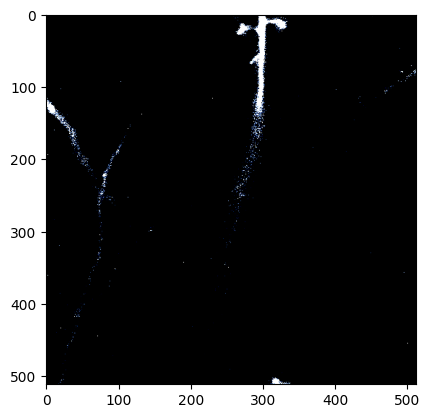

In [14]:
plt.imshow(image.detach().cpu().permute(1,2,0).numpy())

In [15]:
annotation

[{'id': 2,
  'image_id': 2,
  'category_id': 0,
  'bbox': [255, 6, 37, 29],
  'area': 1073,
  'iscrowd': 0},
 {'id': 3,
  'image_id': 2,
  'category_id': 0,
  'bbox': [279, 53, 15, 21],
  'area': 315,
  'iscrowd': 0},
 {'id': 4,
  'image_id': 2,
  'category_id': 0,
  'bbox': [302, 3, 36, 26],
  'area': 936,
  'iscrowd': 0}]

In [16]:
def collate_fn(data):
    return data

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

In [20]:
image, annotation = next(iter(train_data_loader))[0]

In [21]:
annotation

[{'id': 4271,
  'image_id': 691,
  'category_id': 0,
  'bbox': [257, 303, 13, 17],
  'area': 221,
  'iscrowd': 0},
 {'id': 4272,
  'image_id': 691,
  'category_id': 0,
  'bbox': [277, 287, 17, 18],
  'area': 306,
  'iscrowd': 0}]

In [32]:
bboxes = list(map(lambda x: [x['bbox'][0], x['bbox'][1], x['bbox'][0]+x['bbox'][2], x['bbox'][1]+x['bbox'][3]], annotation))
labels = list(map(lambda x: x['category_id'], annotation))
bboxes, labels

([[257, 303, 270, 320], [277, 287, 294, 305]], [0, 0])